In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.sparse import hstack
import joblib


In [2]:
#loading the dataset
data = pd.read_csv("bank_data_train.csv")

In [8]:
# Separating the  features and target
# x contains all the features from the input
X = data.drop(columns=['TARGET'])
# y contains the  target features 
y = data['TARGET']

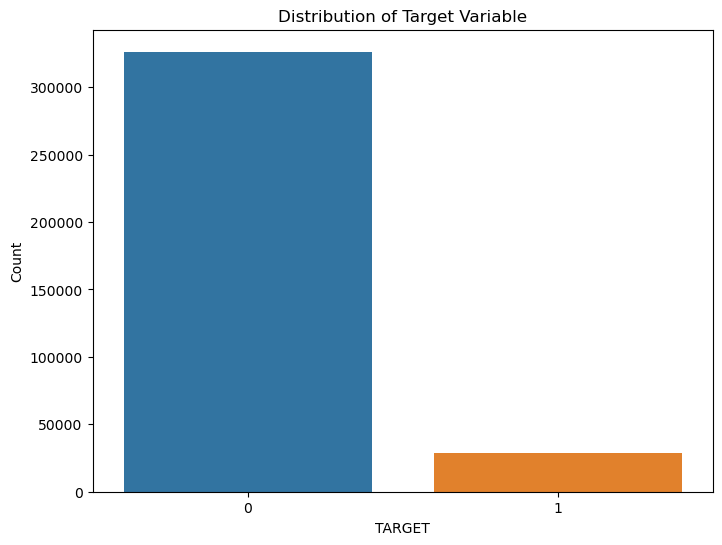

In [41]:
#Distribution of target variable using count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='TARGET', data=data)
plt.title('Distribution of Target Variable')
plt.xlabel('TARGET')
plt.ylabel('Count')
plt.show()

In [15]:
# List of all numerical columns
numerical_columns = ['CR_PROD_CNT_IL', 'AMOUNT_RUB_CLO_PRC', 'PRC_ACCEPTS_A_EMAIL_LINK', 
                     'APP_REGISTR_RGN_CODE', 'PRC_ACCEPTS_A_POS', 'AGE', 'CLNT_SALARY_VALUE',
                     'TURNOVER_DYNAMIC_IL_1M', 'AMOUNT_RUB_SUP_PRC', 'REST_DYNAMIC_FDEP_1M', 
                     'REST_DYNAMIC_SAVE_3M', 'CR_PROD_CNT_VCU', 'REST_AVG_CUR', 'AMOUNT_RUB_NAS_PRC',
                     'TRANS_COUNT_SUP_PRC', 'TRANS_COUNT_NAS_PRC', 'CR_PROD_CNT_TOVR', 
                     'CR_PROD_CNT_PIL', 'TURNOVER_CC', 'TRANS_COUNT_ATM_PRC', 'AMOUNT_RUB_ATM_PRC', 
                     'TURNOVER_PAYM', 'AGE', 'CR_PROD_CNT_CC', 'REST_DYNAMIC_FDEP_3M', 'REST_DYNAMIC_IL_1M', 
                     'CR_PROD_CNT_CCFP', 'REST_DYNAMIC_CUR_1M', 'REST_AVG_PAYM', 'LDEAL_GRACE_DAYS_PCT_MED', 
                     'REST_DYNAMIC_CUR_3M', 'CNT_TRAN_SUP_TENDENCY3M', 'TURNOVER_DYNAMIC_CUR_1M', 
                     'REST_DYNAMIC_PAYM_3M', 'SUM_TRAN_SUP_TENDENCY3M', 'REST_DYNAMIC_IL_3M', 
                     'CNT_TRAN_ATM_TENDENCY3M', 'CNT_TRAN_ATM_TENDENCY1M', 'TURNOVER_DYNAMIC_IL_3M', 
                     'SUM_TRAN_ATM_TENDENCY3M', 'SUM_TRAN_ATM_TENDENCY1M', 'REST_DYNAMIC_PAYM_1M', 
                     'TURNOVER_DYNAMIC_CUR_3M', 'CLNT_SETUP_TENOR', 'TURNOVER_DYNAMIC_PAYM_3M', 
                     'TURNOVER_DYNAMIC_PAYM_1M', 'TRANS_AMOUNT_TENDENCY3M', 'TRANS_CNT_TENDENCY3M', 
                     'REST_DYNAMIC_CC_1M', 'TURNOVER_DYNAMIC_CC_1M', 'REST_DYNAMIC_CC_3M', 
                     'TURNOVER_DYNAMIC_CC_3M']

In [16]:
# List of all categorical columns
categorical_columns = ['APP_MARITAL_STATUS', 'APP_KIND_OF_PROP_HABITATION', 'CLNT_JOB_POSITION', 
                       'CLNT_TRUST_RELATION', 'APP_DRIVING_LICENSE', 'APP_EDUCATION', 
                       'APP_POSITION_TYPE', 'APP_EMP_TYPE', 'APP_COMP_TYPE', 'PACK']

In [17]:
# Ensure only existing columns 
#lists of numerical and categorical columns only include columns from the dataframe X.
existing_numerical_columns = [col for col in numerical_columns if col in X.columns]
existing_categorical_columns = [col for col in categorical_columns if col in X.columns]

In [18]:
# Checking for missing columns
missing_columns = [col for col in numerical_columns + categorical_columns if col not in X.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")

In [19]:
# Handle missing values
# Creating an  imputer for numerical columns using the strategy median
imputer_numerical = SimpleImputer(strategy='median')
# Create an imputer for categorical columns using the strategy most frequent
imputer_categorical = SimpleImputer(strategy='most_frequent')

#Fit the numerical imputer to the numerical columns and transform
X[existing_numerical_columns] = imputer_numerical.fit_transform(X[existing_numerical_columns])
#Fit the categorical imputer to the existing categorical columns to transform 
X[existing_categorical_columns] = imputer_categorical.fit_transform(X[existing_categorical_columns])

In [20]:
# One-hot encoding for  categorical variables
# Create an instance for  OneHotEncoder
encoder = OneHotEncoder(sparse=True, handle_unknown='ignore')
encoded_categorical = encoder.fit_transform(X[existing_categorical_columns])

In [23]:
# Concatenate numerical and categorical data
X_numerical = pd.DataFrame(X[existing_numerical_columns], columns=existing_numerical_columns)
X_combined = hstack([X_numerical, encoded_categorical])

In [24]:
# Standardize numerical features
scaler = StandardScaler(with_mean=False)
# Fit the Standard Scaler to the combined features set and transform
X_combined = scaler.fit_transform(X_combined)

In [25]:
# Reducing dimensionality using TruncatedSVD
# TruncatedSVD is used to reduce the dimensionality of the feature set, which can help improve computational efficiency and models performance.
svd = TruncatedSVD(n_components=20, random_state=42)
# Apply the TruncatedSVD to the concatenated feature set and transform it.
# This decreases the dimensionality of the features collection to 20 components.
X_combined = svd.fit_transform(X_combined)

In [26]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

In [27]:
# Address class imbalance using SMOTE
# Create an instance for SMOTE
smote = SMOTE(random_state=42)
# Fit the SMOTE to the training dataset and resample it 
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


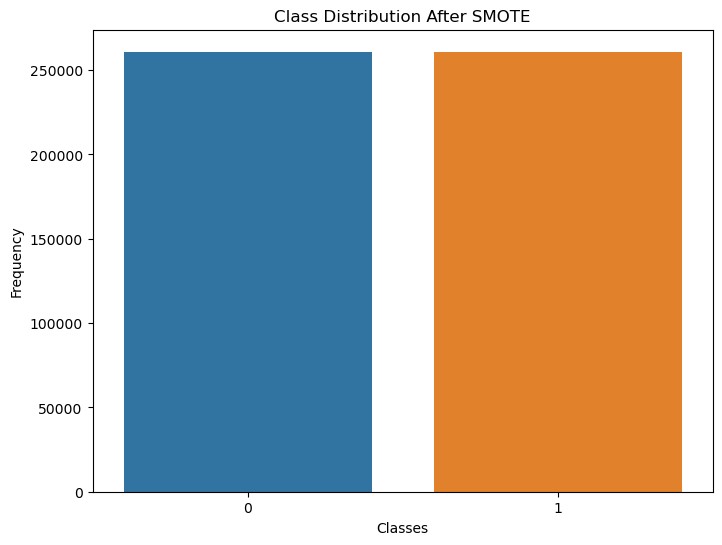

In [46]:
# Visualizing the class distribution after SMOTE
# countplot to show class distribution 
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()

In [28]:
# Build and train the RandomForest classifier using the hyperparameters.
# Create an instance of RandomForestClassifier with the provided hyperparameters.
rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, random_state=42)
#Fit the RandomForest model on the resampled training data.
# This trains the model with resampled variables and labels.
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=200,
                       random_state=42)

In [29]:
# Evaluate the RandomForest model
# Model metrics
y_pred_rf = rf_model.predict(X_test)
print("RandomForest Model")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")


RandomForest Model
Accuracy: 0.8308229398350179
Confusion Matrix:
[[57328  7985]
 [ 4033  1692]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.91     65313
           1       0.17      0.30      0.22      5725

    accuracy                           0.83     71038
   macro avg       0.55      0.59      0.56     71038
weighted avg       0.87      0.83      0.85     71038



In [30]:
# Save the RandomForest model
joblib.dump(rf_model, 'churnrf_model.pkl')

['churnrf_model.pkl']

In [31]:
# Select a small subset of training data
# sample_fraction=0.01 indicates that 1% of the resampled train data will be utilized as a sample.
sample_fraction = 0.01  
X_train_sampled, _, y_train_sampled, _ = train_test_split(X_train_resampled, y_train_resampled, test_size=1-sample_fraction, random_state=42)


In [32]:
# Build the DNN model
dnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_sampled.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [33]:
# Compile the DNN model
# Compile the DNN model with the specified optimizer, loss function, and metric
dnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
# defining early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [35]:
# Train the DNN model using the sampled data with early stopping
dnn_model.fit(X_train_sampled, y_train_sampled, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/10
131/131 [==============================] - 3s 8ms/step - loss: 0.8307 - accuracy: 0.5063 - val_loss: 0.6937 - val_accuracy: 0.4885
Epoch 2/10
131/131 [==============================] - 1s 4ms/step - loss: 0.7180 - accuracy: 0.5083 - val_loss: 0.6887 - val_accuracy: 0.5527
Epoch 3/10
131/131 [==============================] - 1s 4ms/step - loss: 0.7017 - accuracy: 0.5317 - val_loss: 0.6854 - val_accuracy: 0.5546
Epoch 4/10
131/131 [==============================] - 1s 5ms/step - loss: 0.6964 - accuracy: 0.5344 - val_loss: 0.6861 - val_accuracy: 0.5383
Epoch 5/10
131/131 [==============================] - 1s 5ms/step - loss: 0.6931 - accuracy: 0.5368 - val_loss: 0.6817 - val_accuracy: 0.5843
Epoch 6/10
131/131 [==============================] - 1s 4ms/step - loss: 0.6930 - accuracy: 0.5344 - val_loss: 0.6767 - val_accuracy: 0.6006
Epoch 7/10
131/131 [==============================] - 1s 5ms/step - loss: 0.6915 - accuracy: 0.5262 - val_loss: 0.6859 - val_accuracy: 0.5144
Epoch 

In [36]:
# Evaluate the DNN model
#funtion to predict as batches
def predict_in_batches(model, X, batch_size=1000):
    num_samples = X.shape[0]
    # creating an empty list to storec the  predictions
    predictions = []
    # Iterating over the input data in batches
    for start in range(0, num_samples, batch_size):
        end = min(start + batch_size, num_samples)
        X_batch = X[start:end]
        predictions.append(model.predict(X_batch))
    return np.vstack(predictions)

In [37]:
# Predicting the target variable using DNN model in batches.batches
y_pred_dnn = (predict_in_batches(dnn_model, X_test) > 0.5).astype("int32")

2/2 [==============================] - 0s 0s/step


In [38]:
# Evaluate the DNN model
print("DNN Model")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dnn)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_dnn)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_dnn)}")

DNN Model
Accuracy: 0.5286466398265717
Confusion Matrix:
[[33590 31723]
 [ 1761  3964]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.51      0.67     65313
           1       0.11      0.69      0.19      5725

    accuracy                           0.53     71038
   macro avg       0.53      0.60      0.43     71038
weighted avg       0.88      0.53      0.63     71038



In [39]:
# Save the DNN model
dnn_model.save('churndnn_model.keras')

In [40]:
# Save the  preprocessing objects
joblib.dump(imputer_numerical, 'churnimputer_numerical.pkl')
joblib.dump(imputer_categorical, 'churnimputer_categorical.pkl')
joblib.dump(encoder, 'churnencoder.pkl')
joblib.dump(scaler, 'churnscaler.pkl')
joblib.dump(svd, 'churnsvd.pkl')

['churnsvd.pkl']